## Importing Libraries

In [2]:
from sklearn.metrics import confusion_matrix, make_scorer, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from zipfile import ZipFile
from pathlib import Path
import warnings
import time
import os

import pandas as pd
import numpy as np

from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

import glob

# Data Preprocessing & Visualization

In [5]:
df = pd.read_parquet(r"C:\Sem VI\BDA\updatedData\Combined.parquet")

In [6]:
display(md(f'#### Rows ${df.shape[0]}$ | Columns ${df.shape[1]}$\n---'))
df.sample(10)

#### Rows $32263069$ | Columns $24$
---

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Flight_Number_Operating_Airline,Operating_Airline,DepDel15,CRSArrTime,Origin,OriginState,Dest,DestState,DepDelay,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDel15,AirTime
21365376,2019,3,9,1,7,2019-09-01,AS,74,AS,0.0,10,ANC,AK,JNU,AK,-20.0,2235,0.0,0.0,571.0,3,-21.0,0.0,74.0
4967611,2018,3,8,16,4,2018-08-16,WN,1787,WN,0.0,1820,STL,MO,PHX,AZ,8.0,1700,0.0,0.0,1262.0,6,2.0,0.0,181.0
10188601,2019,2,4,4,4,2019-04-04,DL,6086,YX,0.0,2240,LGA,NY,SDF,KY,13.0,2010,0.0,0.0,659.0,3,41.0,1.0,114.0
27684361,2021,3,9,21,2,2021-09-21,F9,2092,F9,0.0,2106,SMF,CA,LAS,NV,10.0,1940,0.0,0.0,397.0,2,7.0,0.0,59.0
29498810,2022,1,3,9,3,2022-03-09,AA,1450,AA,NaN,2130,LGA,NY,DCA,VA,NaN,2000,1.0,0.0,214.0,1,NaN,NaN,NaN
22901517,2021,4,11,2,2,2021-11-02,UA,3619,YX,0.0,1802,SAV,GA,EWR,NJ,-9.0,1550,0.0,0.0,708.0,3,-13.0,0.0,97.0
14992033,2019,4,10,20,7,2019-10-20,DL,4644,OO,0.0,1307,LGB,CA,SLC,UT,-3.0,1010,0.0,0.0,588.0,3,-14.0,0.0,95.0
26977461,2021,3,7,24,6,2021-07-24,NK,188,NK,0.0,1410,OAK,CA,LAS,NV,-9.0,1238,0.0,0.0,407.0,2,-18.0,0.0,67.0
4146797,2018,2,6,4,1,2018-06-04,WN,830,WN,0.0,940,SLC,UT,DEN,CO,1.0,815,0.0,0.0,391.0,2,-15.0,0.0,54.0
14848595,2019,4,10,16,3,2019-10-16,WN,977,WN,0.0,1320,TPA,FL,ALB,NY,13.0,1030,0.0,0.0,1130.0,5,-10.0,0.0,138.0


In [14]:
column_with_del = [col for col in df.columns if "Del" in col]
display(md(f'#### Columns with delay data\n---'))
for col in column_with_del: print(col)

#### Columns with delay data
---

DepDel15
DepDelay
ArrDelay
ArrDel15


In [6]:
df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Operating_Airline,DepDel15,CRSArrTime,DepDelay,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDel15,AirTime
count,8091684.0,8.091684e+06,8.091684e+06,8.091684e+06,8.091684e+06,8.091684e+06,7.943766e+06,8.091684e+06,7.943766e+06,8.091684e+06,8.091684e+06,8.091684e+06,8.091684e+06,8.091684e+06,7.917264e+06,7.917264e+06,7.917264e+06
mean,2019.0,2.524110e+00,6.573170e+00,1.573118e+01,3.937864e+00,2.712855e+03,1.872748e-01,1.484759e+03,1.100731e+01,1.330287e+03,1.898604e-02,2.569428e-03,7.681617e+02,3.547731e+00,5.674681e+00,1.929271e-01,1.079366e+02
std,0.0,1.105875e+00,3.402571e+00,8.762414e+00,1.995895e+00,1.836274e+03,3.901320e-01,5.180583e+02,4.975387e+01,4.905830e+02,1.364755e-01,5.062437e-02,5.830840e+02,2.298159e+00,5.182652e+01,3.945963e-01,6.941984e+01
min,2019.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-8.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,1.000000e+00,-9.900000e+01,0.000000e+00,4.000000e+00
25%,2019.0,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,1.122000e+03,0.000000e+00,1.100000e+03,-6.000000e+00,9.150000e+02,0.000000e+00,0.000000e+00,3.430000e+02,2.000000e+00,-1.500000e+01,0.000000e+00,5.800000e+01
50%,2019.0,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,2.316000e+03,0.000000e+00,1.513000e+03,-2.000000e+00,1.322000e+03,0.000000e+00,0.000000e+00,6.050000e+02,3.000000e+00,-6.000000e+00,0.000000e+00,8.900000e+01
75%,2019.0,4.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,4.213000e+03,0.000000e+00,1.919000e+03,7.000000e+00,1.735000e+03,0.000000e+00,0.000000e+00,1.001000e+03,5.000000e+00,8.000000e+00,0.000000e+00,1.370000e+02
max,2019.0,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,9.401000e+03,1.000000e+00,2.400000e+03,2.976000e+03,2.359000e+03,1.000000e+00,1.000000e+00,5.095000e+03,1.100000e+01,2.973000e+03,1.000000e+00,1.557000e+03


# EDA

In [15]:
display(md(f'#### Date Range in Dataset\n---'))
print("Years present in the dataset:", df.Year.unique())
print("Total months present no dataset:", df.Month.unique())
print("Date range in the dataset:" , min(df.FlightDate), "->", max(df.FlightDate))
display(md(f'#### Airline Details in Dataset\n---'))
print("Airlines included in the dataset:\n", list(df['Operating_Airline '].unique()), '\n')
print("The origin airports included are:\n", list(df.Origin.unique()), '\n')
print("Destination airports included are\n:", list(df.Dest.unique()))

#### Date Range in Dataset
---

Years present in the dataset: [2018 2019 2021 2022]
Total months present no dataset: [ 1 10 11 12  2  3  4  5  6  7  8  9]
Date range in the dataset: 2018-01-01 -> 2022-07-31


#### Airline Details in Dataset
---

Airlines included in the dataset:
 ['9E', 'B6', 'EV', 'G4', 'HA', 'NK', 'OO', 'F9', 'EM', 'WN', 'YV', 'YX', 'DL', 'UA', 'AS', 'QX', 'C5', 'AX', 'G7', 'ZW', '9K', 'CP', 'VX', 'KS', 'MQ', 'AA', 'OH', 'PT'] 

The origin airports included are:
 ['ABY', 'ATL', 'MOB', 'BUF', 'DFW', 'BTV', 'CVG', 'LGA', 'CHO', 'EWN', 'MCI', 'MGM', 'MSP', 'DCA', 'FAY', 'OAJ', 'STL', 'CWA', 'DTW', 'RDU', 'SRQ', 'AEX', 'AUS', 'CSG', 'EVV', 'IND', 'CLE', 'PIA', 'TRI', 'BGR', 'IAD', 'PWM', 'TYS', 'GSO', 'AVL', 'BTR', 'MKE', 'CMH', 'GRR', 'GSP', 'BIS', 'ORD', 'ROC', 'CHA', 'TVC', 'FSM', 'JAX', 'BOS', 'GRB', 'TUL', 'VLD', 'CRW', 'IAH', 'XNA', 'JAN', 'SAV', 'CHS', 'ROA', 'GFK', 'SYR', 'MDT', 'SAT', 'BMI', 'LFT', 'BNA', 'PHL', 'BQK', 'ORF', 'GNV', 'OMA', 'TPA', 'BWI', 'MEM', 'MBS', 'SDF', 'LEX', 'CLT', 'DAY', 'MOT', 'FAR', 'CAE', 'DSM', 'PIT', 'DHN', 'MHT', 'ILM', 'SGF', 'ELM', 'BDL', 'MCO', 'RIC', 'SHV', 'MSY', 'HSV', 'TLH', 'LAN', 'LIT', 'GRK', 'MSN', 'ATW', 'HRL', 'HPN', 'CAK', 'EWR', 'RSW', 'BQN', 'PBI', 'FLL', 'S

In [94]:
counts = pd.DataFrame({'Origin':df['Origin'].value_counts(), 'Destination':df['Dest'].value_counts()})
display(md(f'#### Count of All Origin and Destination Airports: ${counts.shape[0]}$\n---'))

display(md('#### Top 15 Airports'))
counts.sort_values(by=['Origin', 'Destination'],ascending=False).head(15)

#### Count of All Origin and Destination Airports: $373$
---

#### Top 15 Airports

,Origin,Destination
ORD,401576,401538
ATL,395652,395670
DFW,304809,304811
DEN,286902,286946
CLT,256440,256431
LAX,248941,248988
SEA,192984,192978
IAH,180013,180008
PHX,178436,178450
DTW,176547,176530


In [13]:
counts = pd.DataFrame({'Total Flights ':df['Operating_Airline '].value_counts()})
display(md(f'#### Count of All Airlines: ${counts.shape[0]}$\n---'))

display(md('#### Top 15 Airlines'))
counts.sort_values(by=['Total Flights '],ascending=False).head(15)

#### Count of All Airlines: $28$
---

#### Top 15 Airlines

,Total Flights
Operating_Airline,
WN,5877009
DL,3705802
AA,3511087
OO,3399452
UA,2672231
YX,1393528
B6,1259327
MQ,1188427
OH,1053596


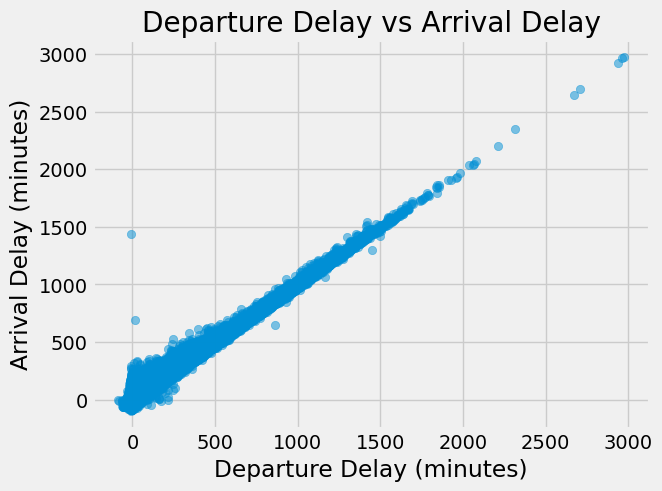

,DepDelay,ArrDelay
DepDelay,1.000000,0.964671
ArrDelay,0.964671,1.000000


In [8]:
plt.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.5)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()
df[['DepDelay','ArrDelay']].corr()

# correlation_matrix

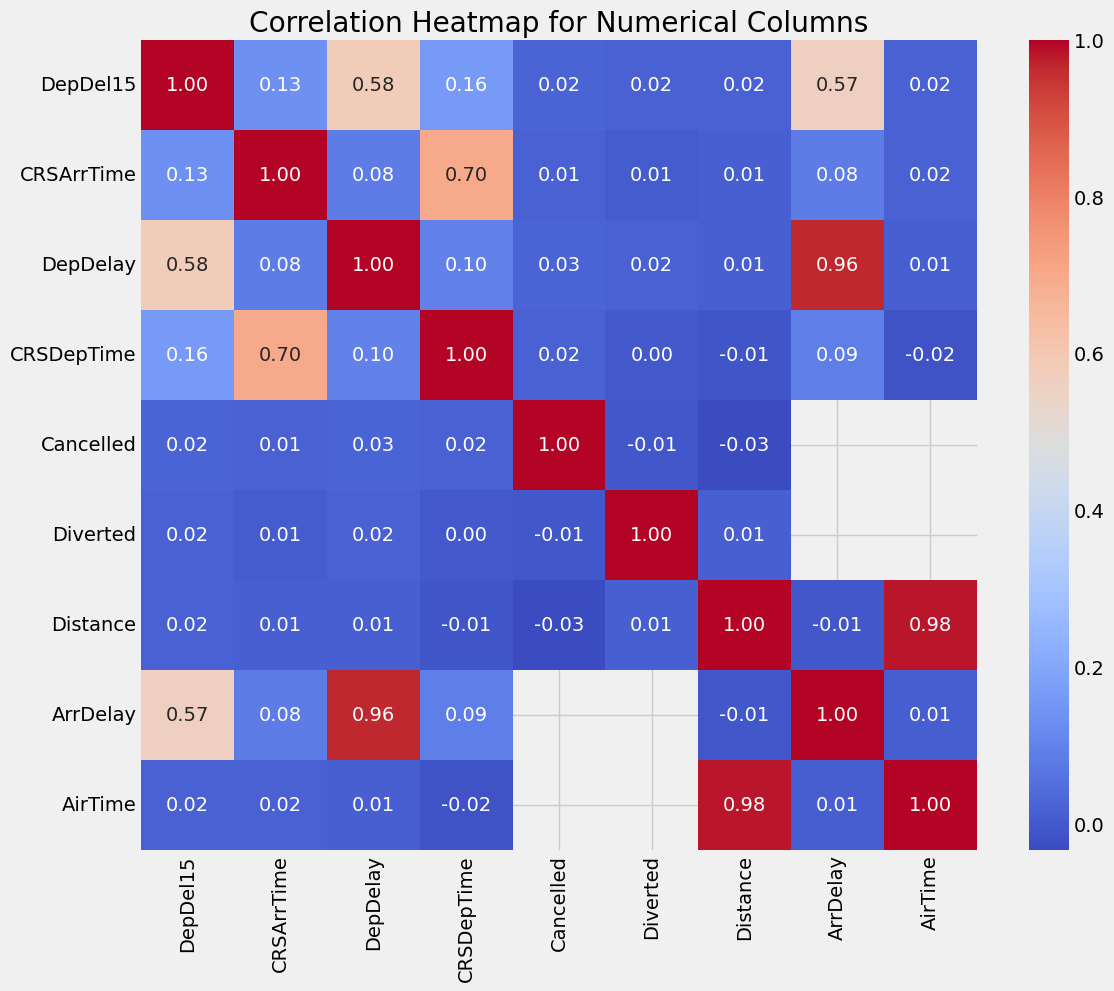

In [9]:
numerical_cols = ['DepDel15', 'CRSArrTime', 'DepDelay', 'CRSDepTime', 'Cancelled', 
                  'Diverted', 'Distance', 'ArrDelay', 'AirTime']

df_numerical = df[numerical_cols]
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

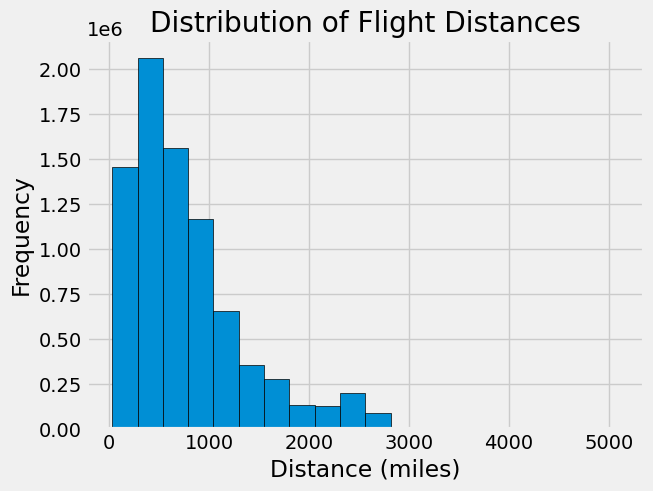

count    8.091684e+06
mean     7.681617e+02
std      5.830840e+02
min      3.100000e+01
25%      3.430000e+02
50%      6.050000e+02
75%      1.001000e+03
max      5.095000e+03
Name: Distance, dtype: float64

In [10]:
plt.hist(df['Distance'], bins=20, edgecolor='black')
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()
df['Distance'].describe()

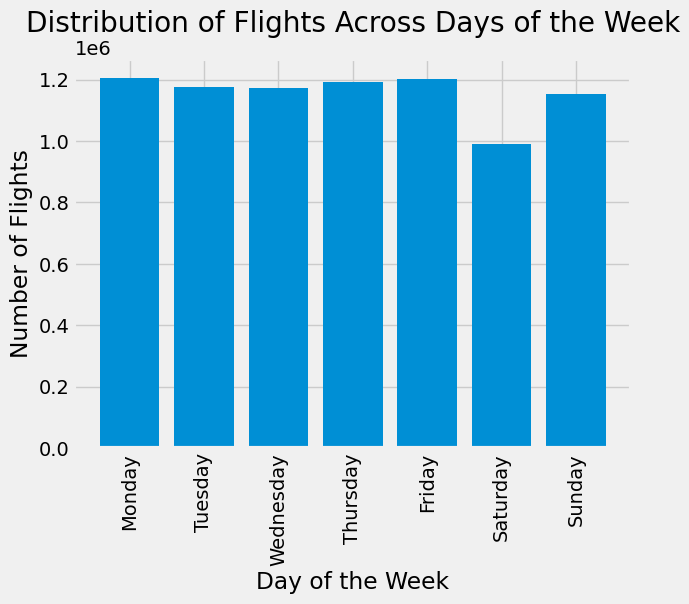

DayOfWeek
1    1206139
2    1175825
3    1172560
4    1192474
5    1201524
6     991171
7    1151991
Name: count, dtype: int64

In [11]:
# Count the occurrences of flights for each day of the week
day_of_week_counts = df['DayOfWeek'].value_counts().sort_index()

# Plotting a bar chart to visualize the distribution of flights across days of the week
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.title('Distribution of Flights Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.show()
df['DayOfWeek'].value_counts().sort_index()

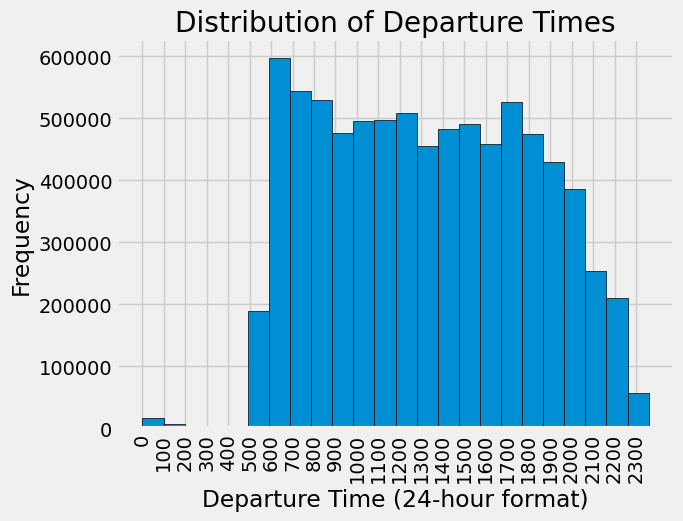

count    8.091684e+06
mean     1.330287e+03
std      4.905830e+02
min      1.000000e+00
25%      9.150000e+02
50%      1.322000e+03
75%      1.735000e+03
max      2.359000e+03
Name: CRSDepTime, dtype: float64

In [14]:
plt.hist(df['CRSDepTime'], bins=24, edgecolor='black')
plt.title('Distribution of Departure Times')
plt.xlabel('Departure Time (24-hour format)')
plt.ylabel('Frequency')
plt.xticks(range(0, 2400, 100), rotation=90)  # Setting x-axis ticks for every 100 hours
plt.show()
df['CRSDepTime'].describe()

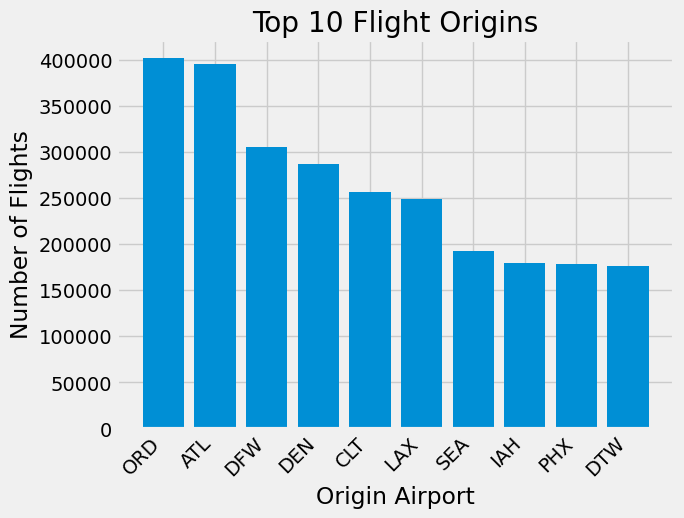

Origin
ORD    401576
ATL    395652
DFW    304809
DEN    286902
CLT    256440
        ...  
OWB       102
HYA        83
GST        82
DLG        82
AKN        61
Name: count, Length: 373, dtype: int64

In [15]:
origin_counts = df['Origin'].value_counts()

plt.bar(origin_counts.index[:10], origin_counts.values[:10])
plt.title('Top 10 Flight Origins')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()
df['Origin'].value_counts()

In [17]:
# Filter the DataFrame for canceled flights
cancelled = df[df['Cancelled'] == 1]

# Display the last few rows of the filtered DataFrame
cancelled.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Flight_Number_Operating_Airline,Operating_Airline,DepDel15,CRSArrTime,Origin,OriginState,Dest,DestState,DepDelay,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDel15,AirTime
8091199,2019,3,9,27,5,2019-09-27,AA,5690,OH,NaN,1925,MSN,WI,CLT,NC,NaN,1607,1.0,0.0,708.0,3,NaN,NaN,NaN
8091215,2019,3,9,15,7,2019-09-15,AA,5691,OH,NaN,854,DAY,OH,LGA,NY,NaN,658,1.0,0.0,549.0,3,NaN,NaN,NaN
8091241,2019,3,9,15,7,2019-09-15,AA,5691,OH,NaN,1133,LGA,NY,DAY,OH,NaN,929,1.0,0.0,549.0,3,NaN,NaN,NaN
8091259,2019,3,9,5,4,2019-09-05,AA,5692,OH,NaN,2156,PHL,PA,ORF,VA,NaN,2049,1.0,0.0,212.0,1,NaN,NaN,NaN
8091260,2019,3,9,6,5,2019-09-06,AA,5692,OH,NaN,2156,PHL,PA,ORF,VA,NaN,2049,1.0,0.0,212.0,1,NaN,NaN,NaN


DayOfWeek
1    0.020107
2    0.018760
3    0.022971
4    0.020281
5    0.014380
6    0.016512
7    0.019578
Name: Cancelled, dtype: float64

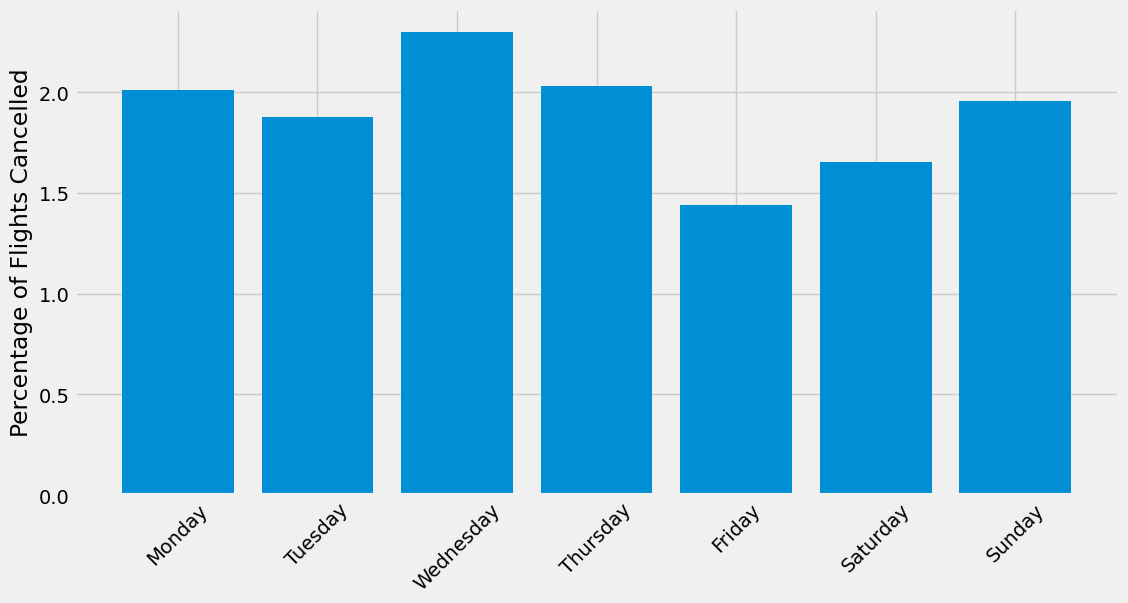

In [18]:
days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)
np.divide(days_cancelled, days_total)

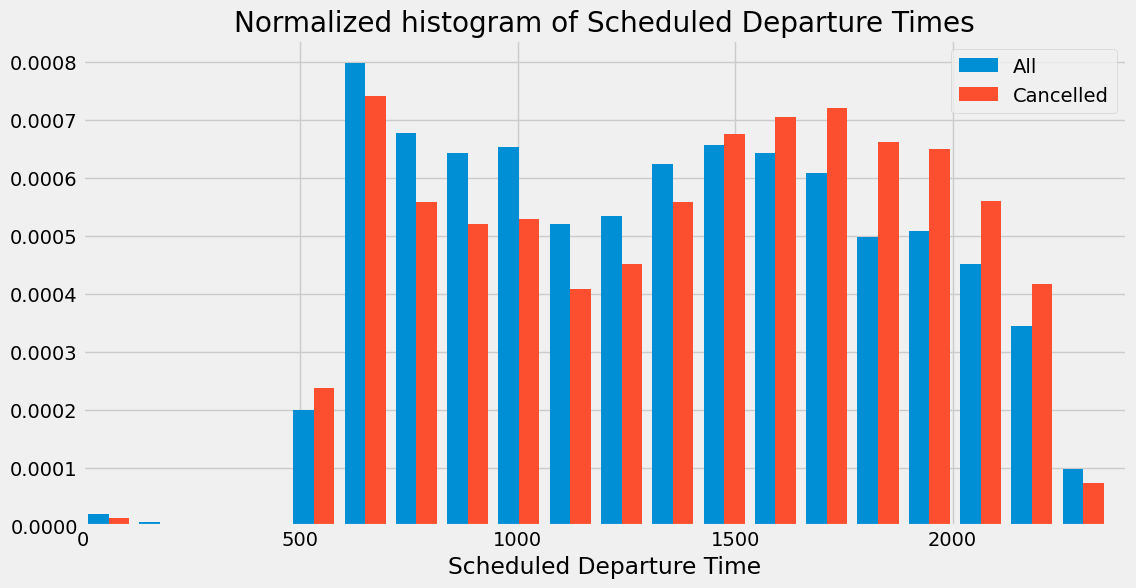

Scheduled Departure Time (All Flights):
60: 0.0000
178: 0.0000
296: 0.0000
414: 0.0000
532: 0.0002
649: 0.0008
767: 0.0007
885: 0.0006
1003: 0.0007
1121: 0.0005
1239: 0.0005
1357: 0.0006
1475: 0.0007
1593: 0.0006
1711: 0.0006
1828: 0.0005
1946: 0.0005
2064: 0.0005
2182: 0.0003
2300: 0.0001

Scheduled Departure Time (Cancelled Flights):
60: 0.0000
178: 0.0000
296: 0.0000
414: 0.0000
532: 0.0002
649: 0.0007
767: 0.0006
885: 0.0005
1003: 0.0005
1121: 0.0004
1239: 0.0005
1357: 0.0006
1475: 0.0007
1593: 0.0007
1711: 0.0007
1828: 0.0007
1946: 0.0006
2064: 0.0006
2182: 0.0004
2300: 0.0001


In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist([df['CRSDepTime'], cancelled['CRSDepTime']], density=True, bins=20, label=['All', 'Cancelled'])
ax.set_xlim(0, 2400)
ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')
plt.legend()
plt.show()

all_hist, all_bins = np.histogram(df['CRSDepTime'], bins=20, density=True)
all_midpoints = (all_bins[1:] + all_bins[:-1]) / 2

cancelled_hist, _ = np.histogram(cancelled['CRSDepTime'], bins=all_bins, density=True)

print("Scheduled Departure Time (All Flights):")
for midpoint, count in zip(all_midpoints, all_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

print("\nScheduled Departure Time (Cancelled Flights):")
for midpoint, count in zip(all_midpoints, cancelled_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

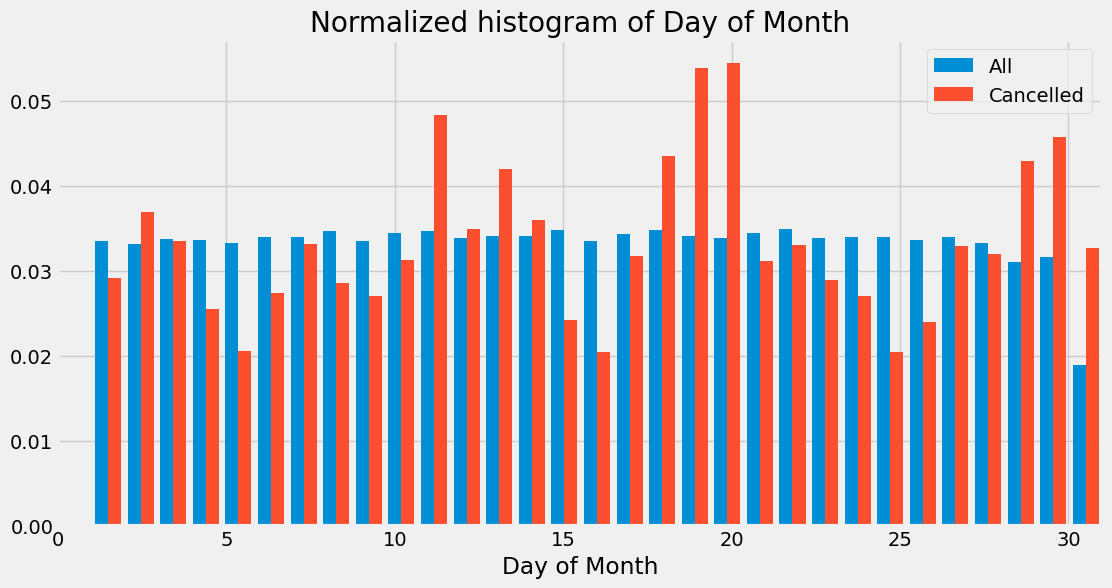

Day of Month (All Flights):
1: 0.0336
2: 0.0331
3: 0.0337
4: 0.0337
5: 0.0332
6: 0.0340
7: 0.0340
8: 0.0346
9: 0.0335
10: 0.0344
11: 0.0347
12: 0.0339
13: 0.0341
14: 0.0341
15: 0.0348
16: 0.0336
17: 0.0343
18: 0.0348
19: 0.0341
20: 0.0339
21: 0.0344
22: 0.0349
23: 0.0338
24: 0.0339
25: 0.0340
26: 0.0336
27: 0.0339
28: 0.0332
29: 0.0310
30: 0.0316
31: 0.0189

Day of Month (Cancelled Flights):
1: 0.0291
2: 0.0369
3: 0.0336
4: 0.0255
5: 0.0206
6: 0.0273
7: 0.0331
8: 0.0286
9: 0.0271
10: 0.0313
11: 0.0483
12: 0.0349
13: 0.0420
14: 0.0359
15: 0.0242
16: 0.0205
17: 0.0317
18: 0.0435
19: 0.0539
20: 0.0545
21: 0.0312
22: 0.0330
23: 0.0289
24: 0.0270
25: 0.0205
26: 0.0240
27: 0.0330
28: 0.0320
29: 0.0429
30: 0.0458
31: 0.0326


In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist([df['DayofMonth'], cancelled['DayofMonth']], density=True, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0, 31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

import numpy as np

all_hist, all_bins = np.histogram(df['DayofMonth'], bins=31, density=True)
all_midpoints = (all_bins[1:] + all_bins[:-1]) / 2

cancelled_hist, _ = np.histogram(cancelled['DayofMonth'], bins=all_bins, density=True)

print("Day of Month (All Flights):")
for midpoint, count in zip(all_midpoints, all_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

print("\nDay of Month (Cancelled Flights):")
for midpoint, count in zip(all_midpoints, cancelled_hist):
    print(f"{midpoint:.0f}: {count:.4f}")


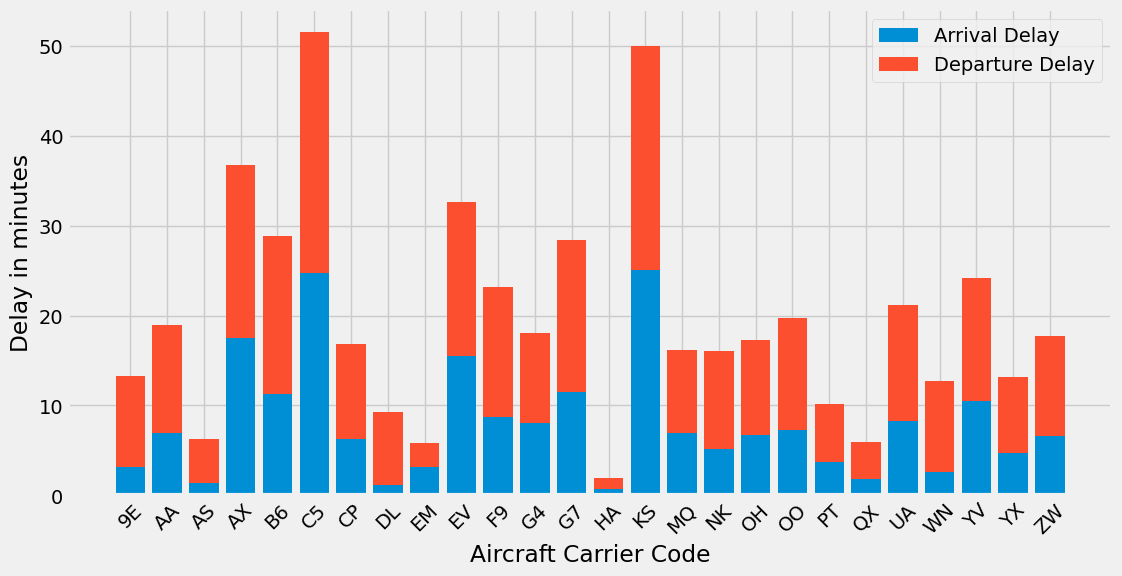

Mean Delay by Aircraft Carrier:
Arrival Delay: Operating_Airline 
9E     3.112229
AA     6.965412
AS     1.351394
AX    17.462860
B6    11.223514
C5    24.724862
CP     6.215722
DL     1.185905
EM     3.176981
EV    15.515935
F9     8.715867
G4     8.005639
G7    11.541344
HA     0.644995
KS    25.063248
MQ     6.935459
NK     5.103484
OH     6.711348
OO     7.214574
PT     3.701585
QX     1.862513
UA     8.289444
WN     2.577351
YV    10.465467
YX     4.727740
ZW     6.599302
Name: ArrDelay, dtype: float64
Departure Delay: Operating_Airline 
9E    10.189807
AA    12.023971
AS     4.959615
AX    19.294881
B6    17.598055
C5    26.773567
CP    10.564511
DL     8.092068
EM     2.624590
EV    17.116567
F9    14.504678
G4    10.091131
G7    16.834005
HA     1.270525
KS    24.944444
MQ     9.204632
NK    10.895904
OH    10.604131
OO    12.505541
PT     6.418541
QX     4.099912
UA    12.910481
WN    10.150988
YV    13.740628
YX     8.485905
ZW    11.097795
Name: DepDelay, dtype: float64


In [21]:
df5=df.copy()
df5['total_delay'] = (df5['ArrDelay'] + df5['DepDelay'])

df_delayed = df5[~df5['total_delay'].isnull()]

df5['total_delay'].fillna(0, inplace=True)

arr_group = df_delayed['ArrDelay'].groupby(df_delayed['Operating_Airline ']).mean()
dep_group = df_delayed['DepDelay'].groupby(df_delayed['Operating_Airline ']).mean()

d_bottom = arr_group.values

x = arr_group.index.values

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation=45)

ax.bar(np.arange(len(x)), arr_group.values, align='center', label='Arrival Delay')
ax.bar(np.arange(len(x)), dep_group.values, align='center', bottom=d_bottom, label='Departure Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Delay in minutes')

plt.legend()

plt.show()

print("Mean Delay by Aircraft Carrier:")
print("Arrival Delay:", arr_group)
print("Departure Delay:", dep_group)


In [23]:
origin_flights = df5['Origin'].groupby(df5['Origin']).count()

origin_cancelled = df5['Cancelled'].groupby(df5['Origin']).sum()

origin_pct_cancelled = 100 * origin_cancelled / origin_flights

origin_avg_dist = df5['Distance'].groupby(df5['Origin']).mean()

origin_avg_delay = df5['total_delay'].groupby(df5['Origin']).mean()

summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled,
                                   origin_avg_dist, origin_avg_delay,
                                ], axis=1)

summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                                 'Average Flight Distance (miles)', 'Average Flight Delay (minutes)',
                                 ]

summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)

summary_table_origin.head(15)


,Total Flights,Cancelled Flights,Percent Cancelled,Average Flight Distance (miles),Average Flight Delay (minutes)
Origin,,,,,
ORD,401576,12919.0,3.217075,684.220031,25.361705
ATL,395652,2400.0,0.606594,646.479899,10.955077
DFW,304809,7839.0,2.571774,778.591915,22.355856
DEN,286902,5887.0,2.051920,861.231651,23.084541
CLT,256440,4246.0,1.655748,534.369763,16.582472
LAX,248941,2999.0,1.204703,1218.277086,12.244391
SEA,192984,2087.0,1.081437,1075.928082,10.391281
IAH,180013,2497.0,1.387122,827.404243,20.918573
PHX,178436,2367.0,1.326526,928.434492,13.337247


In [24]:
dest_flights = df5['Dest'].groupby(df5['Dest']).count()

dest_cancelled = df5['Cancelled'].groupby(df5['Dest']).sum()

dest_pct_cancelled = 100 * dest_cancelled / dest_flights

dest_avg_dist = df5['Distance'].groupby(df5['Dest']).mean()

dest_avg_delay = df5['total_delay'].groupby(df5['Dest']).mean()

summary_table_dest = pd.concat([dest_flights, dest_cancelled, dest_pct_cancelled,
                                 dest_avg_dist, dest_avg_delay
                                ], axis=1)

summary_table_dest.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                               'Average Flight Distance (miles)', 'Average Flight Delay (minutes)'
                               ]

summary_table_dest = summary_table_dest.sort_values('Total Flights', ascending=False)

summary_table_dest.head(15)


,Total Flights,Cancelled Flights,Percent Cancelled,Average Flight Distance (miles),Average Flight Delay (minutes)
Dest,,,,,
ORD,401538,13538.0,3.371536,684.110333,25.908826
ATL,395670,2492.0,0.629818,646.117517,8.481927
DFW,304811,8227.0,2.699050,778.578975,19.967196
DEN,286946,6256.0,2.180201,860.680564,17.928830
CLT,256431,4795.0,1.869899,534.411237,11.500474
LAX,248988,3214.0,1.290825,1219.421783,13.053509
SEA,192978,2249.0,1.165418,1075.713729,10.342459
IAH,180008,2705.0,1.502711,827.468351,17.639744
PHX,178450,2639.0,1.478846,927.805245,13.664231
